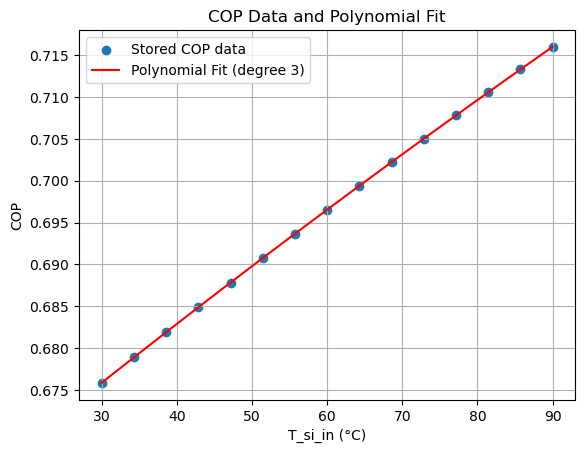

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Use your code above here (copied or imported)
COP_DATA = []         
COP_POLY_COEFFS = np.array([])  
COP_POLY_DEGREE = 3   

def store_COP_data(param, T_si_in):
    cop_val = 1. / calc_COP(param)  # invert reciprocal COP
    COP_DATA.append((T_si_in, cop_val))
    return 1. / cop_val

def generate_COP_fit():
    global COP_POLY_COEFFS
    if not COP_DATA:
        raise ValueError("No COP data to fit.")
    COP_DATA.sort(key=lambda x: x[0])
    T_vals, cop_vals = zip(*COP_DATA)
    COP_POLY_COEFFS = np.polyfit(T_vals, cop_vals, COP_POLY_DEGREE)

def get_COP_from_fit(T_si_in):
    if COP_POLY_COEFFS is None or len(COP_POLY_COEFFS) == 0:
        raise RuntimeError("COP polynomial fit has not been generated.")
    return float(np.polyval(COP_POLY_COEFFS, T_si_in))

# --- Mock HP function for testing --- #
def HP(param):
    # param = (T_co, T_ev)
    T_co, T_ev = param
    # Create mock enthalpy states with fake data for demo:
    h1 = 100 + T_ev
    h2 = 200 + 0.8*T_co
    h3 = 150 + 0.5*T_ev
    return {
        "state1": {"h": h1},
        "state2": {"h": h2},
        "state3": {"h": h3},
    }

def calc_COP(param):
    hp_vals = HP(param)
    state1 = hp_vals["state1"]
    state3 = hp_vals["state3"]
    state2 = hp_vals["state2"]

    q_high = state2["h"] - state3["h"]  # kJ/kg
    w_comp = state2["h"] - state1["h"]  # kJ/kg

    COP = q_high / w_comp
    return 1. / COP  # Return reciprocal

# --- Generate fictional test data --- #
T_si_in_values = np.linspace(30, 90, 15)  # Example input temperature range

for T_si_in in T_si_in_values:
    # Assume T_co and T_ev depend on T_si_in for testing
    T_co = 50 + 0.3 * T_si_in
    T_ev = 10 + 0.1 * T_si_in

    store_COP_data((T_co, T_ev), T_si_in)

# Generate the polynomial fit for COP
generate_COP_fit()

# Plotting the data points and the fit
plt.scatter(*zip(*COP_DATA), label='Stored COP data')

T_plot = np.linspace(min(T_si_in_values), max(T_si_in_values), 200)
COP_fit_vals = [get_COP_from_fit(T) for T in T_plot]

plt.plot(T_plot, COP_fit_vals, 'r-', label='Polynomial Fit (degree {})'.format(COP_POLY_DEGREE))
plt.xlabel('T_si_in (°C)')
plt.ylabel('COP')
plt.title('COP Data and Polynomial Fit')
plt.legend()
plt.grid(True)
plt.show()
